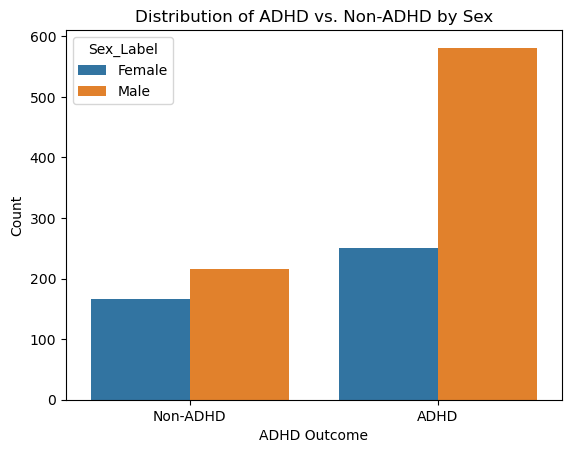

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sols_df = pd.read_excel("C:/Users/syeda.fatima/Downloads/WIDS_Datathon2025_Team/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx")

sols_df['Sex_Label'] = sols_df['Sex_F'].map({0: 'Male', 1: 'Female'})

sns.countplot(data=sols_df, x='ADHD_Outcome', hue='Sex_Label')

plt.xticks([0, 1], ['Non-ADHD', 'ADHD'])
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.title('Distribution of ADHD vs. Non-ADHD by Sex')

plt.show()

In [3]:
cat_df = pd.read_excel("C:/Users/syeda.fatima/Downloads/WIDS_Datathon2025_Team/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
cat_df.head()
cat_df.isnull().sum()

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

In [4]:
print("Parent 2 Education counts:")
print(cat_df['Barratt_Barratt_P2_Edu'].value_counts())

print("\nParent 2 Occupation counts:")
print(cat_df['Barratt_Barratt_P2_Occ'].value_counts())

Parent 2 Education counts:
Barratt_Barratt_P2_Edu
21    323
18    301
0     198
15    166
12    162
9      44
6      14
3       5
Name: count, dtype: int64

Parent 2 Occupation counts:
Barratt_Barratt_P2_Occ
0     287
45    239
35    195
30    149
40    116
15     86
20     41
5      38
10     37
25     25
Name: count, dtype: int64


In [5]:
edu_labels_short = {
    0: "No schooling",
    3: "<7th gr.",
    6: "Jr high/MS",
    9: "Partial HS",
    12: "HS grad",
    15: "Partial coll.",
    18: "College",
    21: "Grad deg."
}

occ_labels_short = {
    0: "Homemaker",
    5: "Laborer/Janitor",
    10: "Garbage coll./Assembly",
    15: "Painter/Construction",
    20: "Auto mech./Reception",
    25: "Machinist/Secretary",
    30: "Supervisor/Librarian",
    35: "Nurse/Technician",
    40: "Engr./Teacher/Military",
    45: "Phys./Attorney/Prof."
}

#mapping 
cat_df['Parent2EduLabel'] = cat_df['Barratt_Barratt_P2_Edu'].map(edu_labels_short)
cat_df['Parent2OccLabel'] = cat_df['Barratt_Barratt_P2_Occ'].map(occ_labels_short)
edu_order = cat_df['Parent2EduLabel'].value_counts().index
occ_order = cat_df['Parent2OccLabel'].value_counts().index


# Parent 2 Education

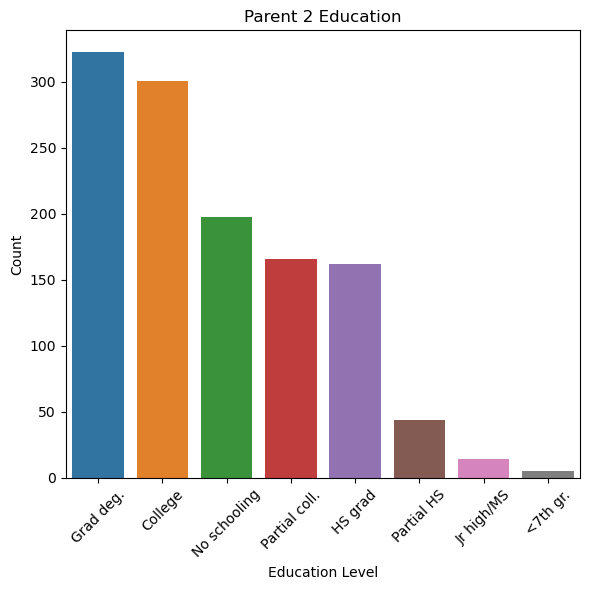

In [6]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Parent2EduLabel', data=cat_df, order=edu_order)
plt.title('Parent 2 Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Parent 2 Occupation

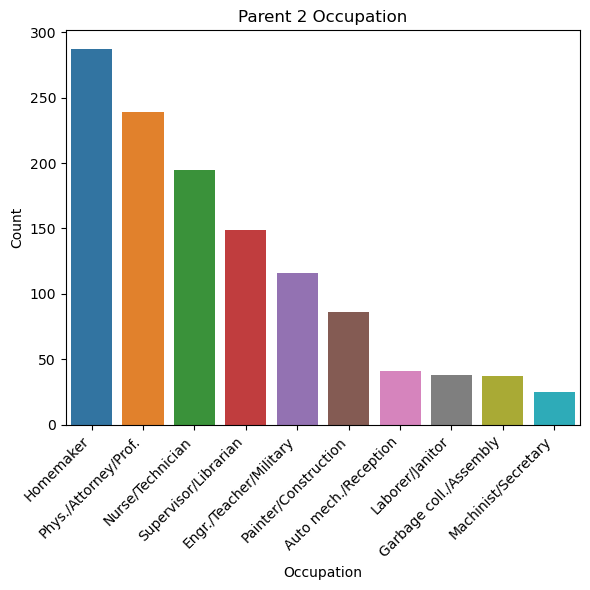

In [7]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Parent2OccLabel', data=cat_df, order=occ_order)
plt.title('Parent 2 Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
# Parent 1 Education
p1_edu_labels = {
    3:  "<7th gr.",
    6:  "Jr high/MS",
    9:  "Partial HS",
    12: "HS grad",
    15: "Partial coll.",
    18: "College",
    21: "Grad deg."
}

# Parent 1 Occupation
p1_occ_labels = {
    0:  "Homemaker",
    5:  "Laborer/Janitor",
    10: "Garbage coll./Assembly",
    15: "Painter/Constr./Driver",
    20: "Auto mech./Typist/H'dresser",
    25: "Machinist/Musician/Bookkpr",
    30: "Supervisor/Librarian/Electrician",
    35: "Nurse/Tech/Manager/Police",
    40: "Eng./Teacher/Vet./Mil. off.",
    45: "Phys./Atty./Prof./CEO"
}

In [9]:
# mapping numeric values to labels 
cat_df['Parent1EduLabel'] = cat_df['Barratt_Barratt_P1_Edu'].map(p1_edu_labels)
cat_df['Parent1OccLabel'] = cat_df['Barratt_Barratt_P1_Occ'].map(p1_occ_labels)
edu_order = cat_df['Parent1EduLabel'].value_counts().index
occ_order = cat_df['Parent1OccLabel'].value_counts().index


# Parent 1 Educatio

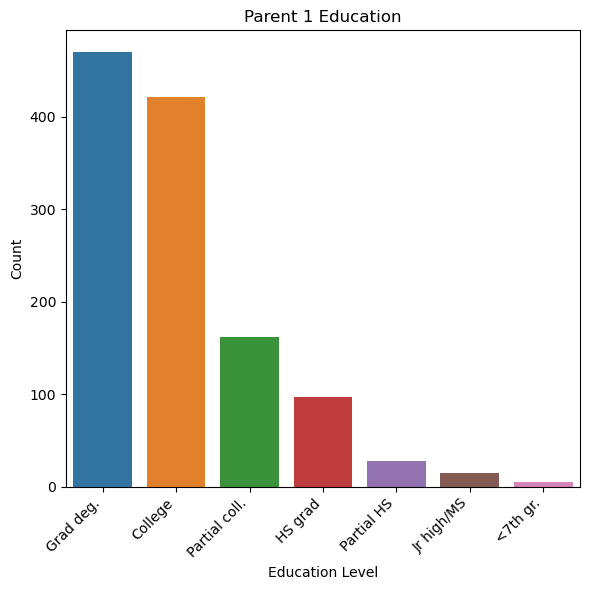

In [10]:

plt.figure(figsize=(6, 6))
sns.countplot(
    x='Parent1EduLabel',
    data=cat_df,
    order=edu_order
)
plt.title('Parent 1 Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

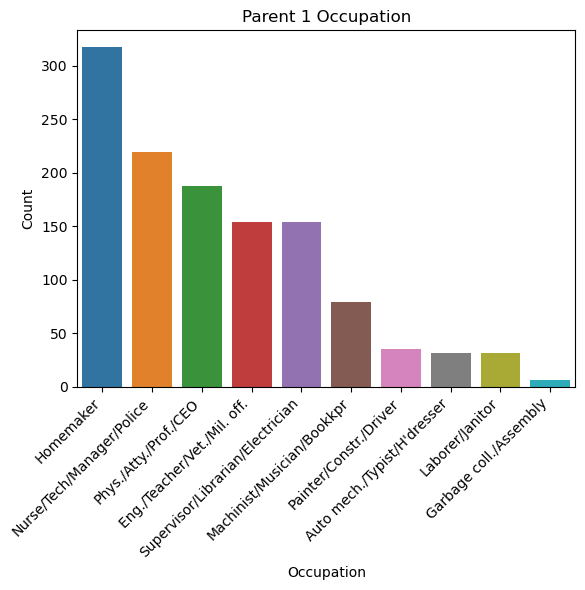

In [11]:
# Parent 1 Occupation
plt.figure(figsize=(6, 6))
sns.countplot(
    x='Parent1OccLabel',
    data=cat_df,
    order=occ_order
)
plt.title('Parent 1 Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Alabama questionnaire.

In [36]:
df_quan = pd.read_excel("../widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")

#### Renaming columns

In [42]:
APQ_cols = {
    "APQ_P_APQ_P_CP": "APQ_CorporalPunish",
    "APQ_P_APQ_P_ID": "APQ_InconsistentDisc",
    "APQ_P_APQ_P_INV": "APQ_Involvement",
    "APQ_P_APQ_P_OPD": "APQ_OtherDiscPractices",
    "APQ_P_APQ_P_PM": "APQ_PoorMonitoring",
    "APQ_P_APQ_P_PP": "APQ_PositiveParenting"
}

df_quan = df_quan.rename(columns=APQ_cols)

df_quan.head()


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_CorporalPunish,APQ_InconsistentDisc,APQ_Involvement,APQ_OtherDiscPractices,APQ_PoorMonitoring,APQ_PositiveParenting,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


No missing values.

In [58]:
for col in APQ_cols:
    min_val = df_quan[col].min()
    max_val = df_quan[col].max()
    print(f"Range of {col}: {min_val} to {max_val}")

Range of APQ_CorporalPunish: 0 to 12
Range of APQ_InconsistentDisc: 0 to 28
Range of APQ_Involvement: 0 to 50
Range of APQ_OtherDiscPractices: 0 to 28
Range of APQ_PoorMonitoring: 0 to 37
Range of APQ_PositiveParenting: 0 to 30


Individual hist plots to check the distribution 

c:\Users\syeda.fatima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\syeda.fatima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\syeda.fatima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\syeda.fatima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

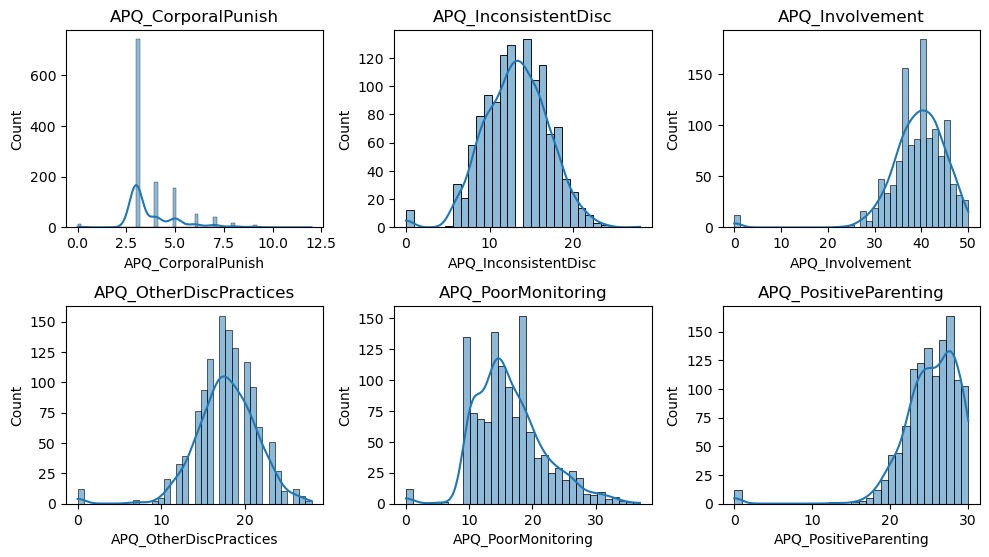

In [44]:
plt.figure(figsize=(10, 8))
for i, (old_col, new_col) in enumerate(APQ_cols.items(), 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_quan, x=new_col, kde=True)  
    plt.title(new_col)
    plt.tight_layout()
plt.show()


Corr matrix

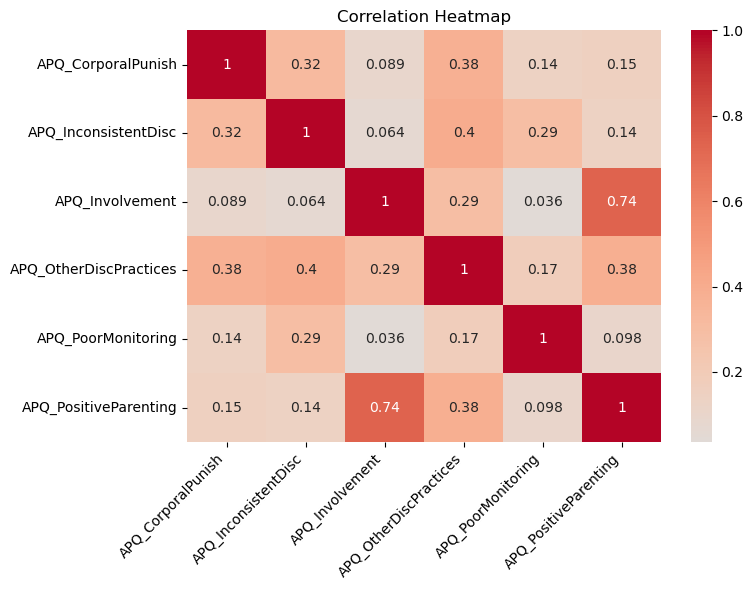

In [56]:
APQ_cols = [
    "APQ_CorporalPunish",
    "APQ_InconsistentDisc",
    "APQ_Involvement",
    "APQ_OtherDiscPractices",
    "APQ_PoorMonitoring",
    "APQ_PositiveParenting"
]

corr_matrix = df_quan[APQ_cols].corr()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
ax.set_title("Correlation Heatmap")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


Merging with sols df

In [61]:
merged_df = pd.merge(sols_df, df_quan, on='participant_id', how='inner')
merged_df.head()

,participant_id,ADHD_Outcome,Sex_F,Sex_Label,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_CorporalPunish,APQ_InconsistentDisc,APQ_Involvement,APQ_OtherDiscPractices,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,1,1,Female,40.00,13,3,10,47,13,...,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,1,0,Male,-94.47,14,3,13,34,18,...,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,1,0,Male,-46.67,14,4,10,35,16,...,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,1,1,Female,-26.68,10,5,12,39,19,...,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,1,1,Female,0.00,14,5,15,40,20,...,1,18,4,11,4,10,7,3,9,8.940679


In [63]:
# converting Sex_F to 'Male','Female' for the plot. 
merged_df['Sex_Label'] = merged_df['Sex_F'].map({0: 'Male', 1: 'Female'})

# Mappin ADHD_Outcome from 0/1 to Non-ADHD/ADHD
merged_df['ADHD_Label'] = merged_df['ADHD_Outcome'].map({0: 'Non-ADHD', 1: 'ADHD'})
merged_df.columns


Index(['participant_id', 'ADHD_Outcome', 'Sex_F', 'Sex_Label', 'EHQ_EHQ_Total',
       'ColorVision_CV_Score', 'APQ_CorporalPunish', 'APQ_InconsistentDisc',
       'APQ_Involvement', 'APQ_OtherDiscPractices', 'APQ_PoorMonitoring',
       'APQ_PositiveParenting', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan',
       'ADHD_Label'],
      dtype='object')

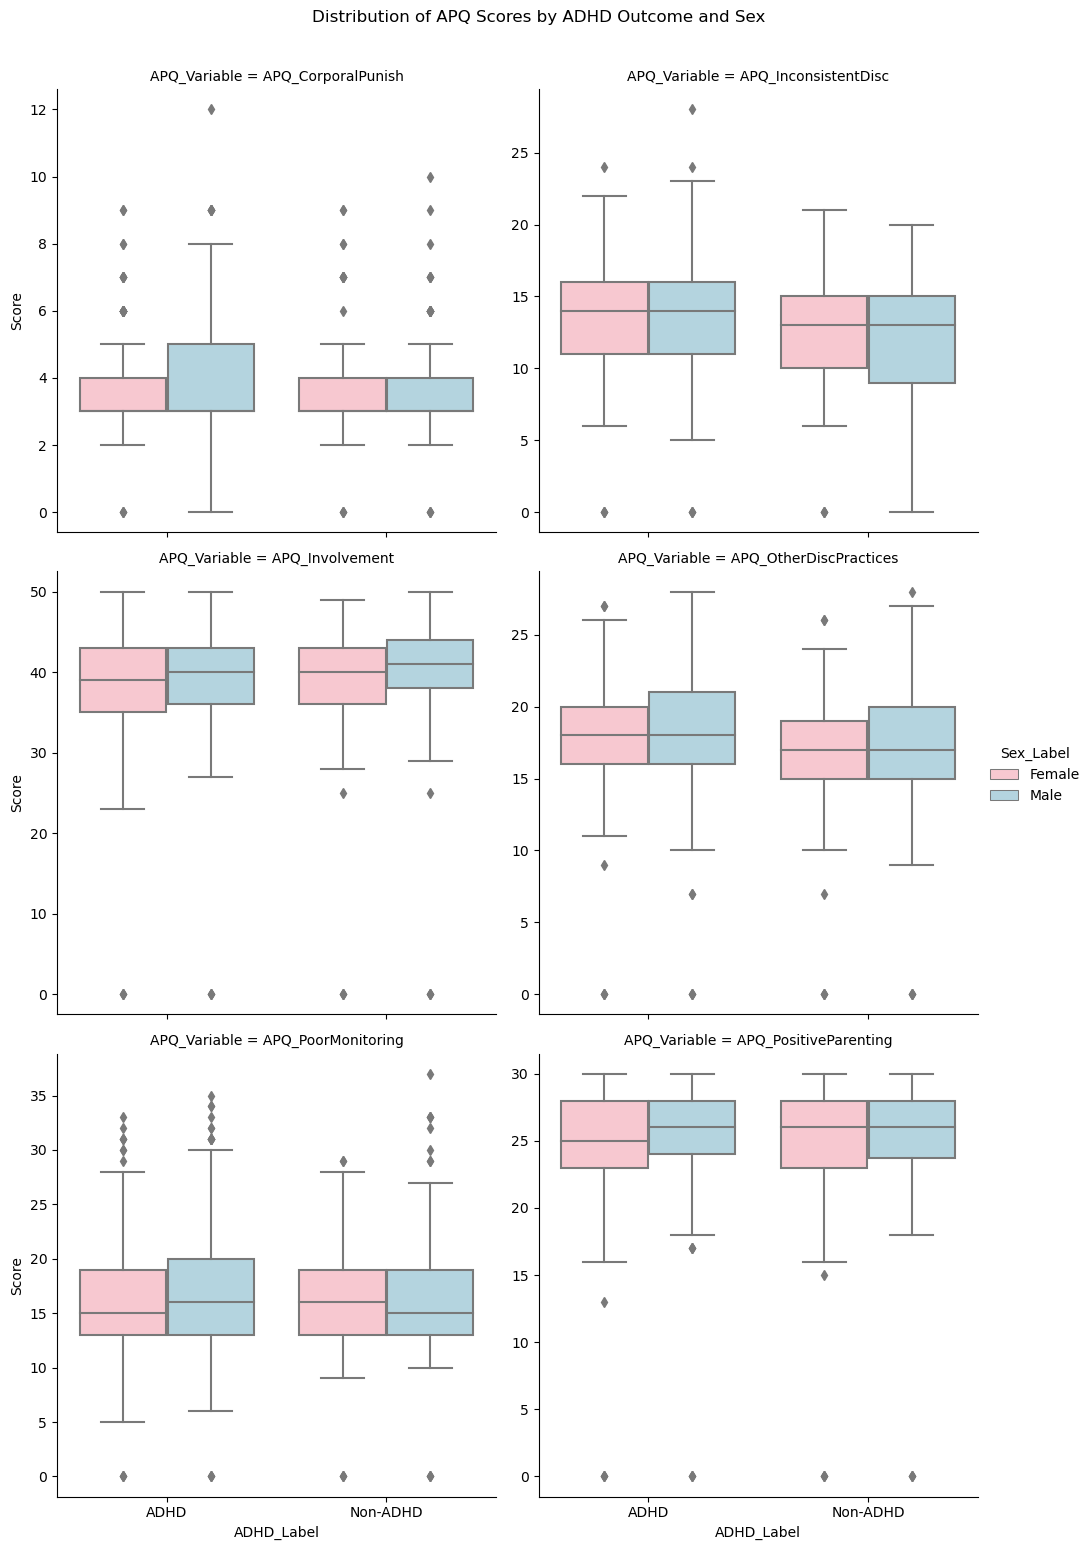

In [75]:
# Melting the APQ columns into a long format to plot easily
melted = merged_df.melt(
    id_vars=['participant_id', 'ADHD_Label', 'Sex_Label'],
    value_vars=APQ_cols,
    var_name='APQ_Variable',
    value_name='Score'
)

# creating a facet grid of boxplots: ADHD_Label on x, Score on y, separate plots by APQ_Variable
g = sns.catplot(
    data=melted,
    x='ADHD_Label', y='Score', 
    col='APQ_Variable', 
    kind='box', 
    hue='Sex_Label',
    col_wrap=2,   
    sharey=False,
    palette={'Female': 'pink', 'Male': 'lightblue'}
)

g.figure.suptitle("Distribution of APQ Scores by ADHD Outcome and Sex", y=1.03)
plt.show()

C:\Users\syeda.fatima\AppData\Local\Temp\ipykernel_20868\2554857369.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g2 = sns.catplot(


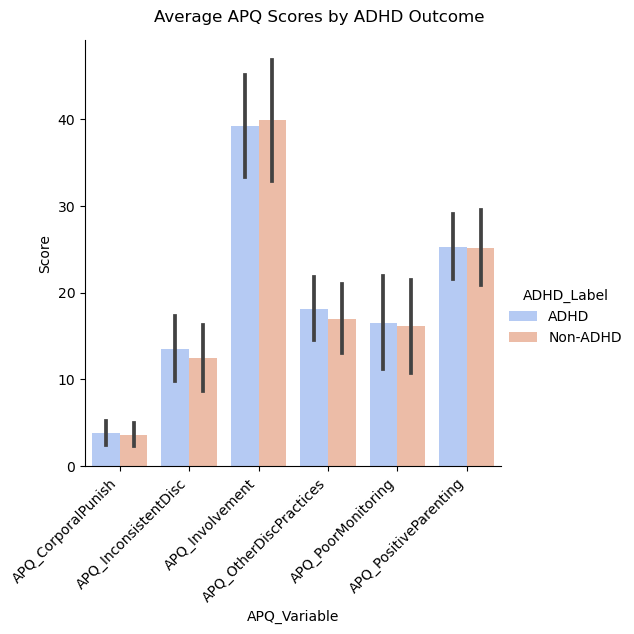

In [76]:
import numpy as np

g2 = sns.catplot(
    data=melted,
    x='APQ_Variable', y='Score', 
    hue='ADHD_Label',
    kind='bar',
    estimator=np.mean,
    ci='sd',
    palette='coolwarm'
)
g2.set_xticklabels(rotation=45, ha='right')
g2.fig.suptitle("Average APQ Scores by ADHD Outcome", y=1.03)
plt.show()
